In [2]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
sim = rebound.Simulation()
#sim.units = ('AU', 'yr', 'Msun')
sim.add(m=1)
sim.add(m=0.0009547919099366768, x=4.700873257350307, y=-1.638871658756794, z=-0.09837100227914734, vx=0.1391574941369194, vy=0.4348006080824522, vz=-0.004917193679728236)
sim.move_to_com()
sim.integrator = "whfast"
sim.dt = .01
simtime = 100
exit_max_distance = 10

delta_a_list = []
orbit_list = []
rings = 200
as_per_ring = 1
for i in range (rings):

    for j in range (as_per_ring):
        a_list = []
        # create sim with sun and jupiter
        
        clear_output(wait=True)
        print(i/rings)

        # create astroid
        mass = 1e-29
        radius = 2.400+0.001*i
        # res on 2.502

        omega =(2*np.pi)/as_per_ring*i
        ecc = 0.2*random.random()

        sim.add(m=mass,a=radius,omega=omega, e=ecc)
        for years in range(simtime):

            
            sim.integrate(float(years)*2.*np.pi)  
            a_list.append(sim.particles[2].a)


            #sim.integrate(years*2*np.pi)
            
        sim.remove(2)
        print(max(a_list)-min(a_list))
        delta_a_list.append(max(a_list)-min(a_list))
        orbit_list.append(radius)

0.995
0.17343011648492768


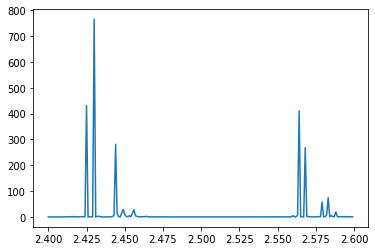

In [4]:

plt.plot(orbit_list,delta_a_list)
plt.show()

In [5]:
max_index = delta_a_list.index(max(delta_a_list))
print(orbit_list[max_index])
print(max(delta_a_list))

2.4299999999999997
765.4966414360224


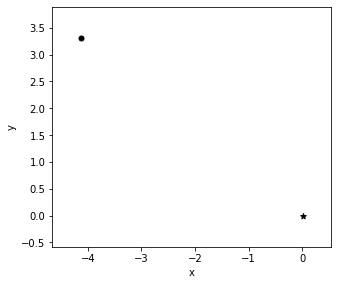

In [6]:
fig, ax = rebound.OrbitPlot(sim, orbit_type=None)